In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import glob

# ETL PROCEDURE

In [3]:
def estrazione_igrometri(lista_stanze:list, source:str):
    """Funzione che cicla sopra i file in cartella contenente csv ottenuti da igrometri, estrae i dati, concatena i dataframe, 
    modifica nomi, tipi e ordine colonne ed esporta un csv."""
    
    now=datetime.now().strftime('%Y%m%d_%H-%M-%S')
    log_file=f"./log_files/{now} - log_file.txt"
    def log(message):
        "Semplice funzione di log"
        with open (log_file,"a") as log:
            log.write(f"{now}: {message}\n")

    log("Creo df_igrometri") 
    df_igrometri=pd.DataFrame()
    
    #ESTRAZIONE DATI
    for n in lista_stanze:
        log(f"Cerco stanza {n}")
        df=pd.DataFrame()
        for file in glob.glob(f"{source}*{n}*.csv"):
            df_temperatura=pd.read_csv(file)
            log(f"df temperatura {n}: {df_temperatura.shape}")

            #TRASFORMAZIONE DATI
            #Inizio condizione particolare utilizzata per i primi csv estratti che erano in formato diverso.
            if df_temperatura.columns[0]=="Date":
                df_temperatura.rename(columns={'Date': 'data','Temp': 'temperatura','Umidità': 'umidita','Remark': 'note'}, inplace=True)
            if df_temperatura.columns[0]=="time":
                df_temperatura.rename(columns={'time': 'data','temperature': 'temperatura','humidity': 'umidita','note': 'note'}, inplace=True)
            #Fine condizione particolare
            df=pd.concat([df,df_temperatura],ignore_index=True).drop_duplicates("data",ignore_index=True)

            df.drop(columns=["note"], inplace=True)
            df["stanza"]=n
            
            log(f"df stanza {n}: {df_temperatura.shape}")
        
        df_igrometri=pd.concat([df_igrometri,df],ignore_index=True)
        df_igrometri.drop(columns=["Unnamed: 4"], inplace=True, errors="ignore")
        log(f"df_igrometri: {df_igrometri.shape}")

    #TRASFORMAZIONE DATI
    # Modifica dtypes delle colonne
    df_igrometri["temperatura"]=df_igrometri["temperatura"].str.replace("℃","")
    df_igrometri["umidita"]=df_igrometri["umidita"].str.replace("%","")
    df_igrometri["stanza"]=df_igrometri["stanza"].astype(str)
    df_igrometri["temperatura"]=df_igrometri["temperatura"].astype(float)
    df_igrometri["umidita"]=df_igrometri["umidita"].astype(float)
    df_igrometri["data"]=pd.to_datetime(df_igrometri["data"])
    
    #LOAD
    df_igrometri.to_csv("igrometri.csv", columns=["data","stanza","temperatura","umidita"], index=False)
    log(f"Esportazione csv.")
    df_igrometri.sort_values(by=["data"], inplace=True)
    return df_igrometri

In [4]:
lista_stanze=["Soggiorno", "Cucina", "Balcone_est", "Balcone_nord", "Bagno", "Camera_2"]
source_folder="./sensor/"

df_igrometri=estrazione_igrometri(lista_stanze, source_folder)

In [5]:
df_igrometri.index

Int64Index([208928, 208929, 208930, 208931, 208932, 208933, 208934, 208935,
            208936, 208937,
            ...
             94506, 208926, 164252,  80990, 128716,  40494,  94507, 208927,
            164253,  80991],
           dtype='int64', length=236160)

In [8]:
df_igrometri.groupby(by=[df_igrometri.data.dt.month,"stanza"]).mean()

temperatura    umidita
data stanza                              
3    Bagno           20.779232  52.746296
     Balcone_est     12.490364  51.190106
     Balcone_nord    11.519311  54.260510
     Camera_2        20.247435  53.556170
     Cucina          20.836320  51.738885
     Soggiorno       21.634679  48.936018
4    Bagno           19.156463  55.975963
     Balcone_est     14.756275  48.103424
     Balcone_nord    13.361093  52.585650
     Camera_2        19.142581  54.475502
     Cucina          19.841185  53.182623
     Soggiorno       20.304903  50.871694
5    Bagno           20.034783  69.988669
     Balcone_est     18.813748  63.248459
     Balcone_nord    17.917518  66.198562
     Camera_2        20.241431  68.327473
     Cucina          20.989763  68.908056
     Soggiorno       21.188849  65.240997
6    Bagno           24.849926  60.255422
     Balcone_est     25.572383  51.697668
     Balcone_nord    23.848404  58.730532
     Camera_2        25.395438  59.920755
     Cucina          26.197508  56.655128
     Soggiorno       26.209205  55.667674
7    Bagno           26.612510  58.531612
     Balcone_est     27.345957  55.049380
     Balcone_nord    25.426483  64.972213
     Camera_2        26.782547  58.834539
     Cucina          27.260435  56.388864
     Soggiorno       27.152413  55.944563
8    Bagno           26.344115  53.004147
     Balcone_nord    25.907162  57.438441
     Camera_2        26.720636  53.888770
     Cucina          27.309276  52.093154
     Soggiorno       27.097988  52.579931
9    Bagno           23.915523  64.320477
     Balcone_est     19.967158  64.849048
     Balcone_nord    19.035127  67.378197
     Camera_2        23.842481  63.494170
     Cucina          24.497900  62.796821
     Soggiorno       24.706069  60.626497
10   Bagno           22.473954  69.558368
     Balcone_est     17.546895  74.470674
     Balcone_nord    17.025974  74.842159
     Camera_2        22.409321  68.449588
     Cucina          22.773340  70.025858
     Soggiorno       23.218802  65.624556
11   Bagno           19.952581  64.217146
     Balcone_est      9.300648  67.587470
     Balcone_nord     8.757597  67.491590
     Camera_2        19.960914  63.313146
     Cucina          19.915537  65.977206
     Soggiorno       20.878030  60.195380
12   Bagno           20.551074  55.204552
     Balcone_est      6.395728  69.889784
     Balcone_nord     6.095228  70.145343
     Camera_2        20.402812  54.454654
     Cucina          19.810528  57.695580
     Soggiorno       21.067315  52.163840

# GRAFICI

## Andamento temperatura delle differenti stanze

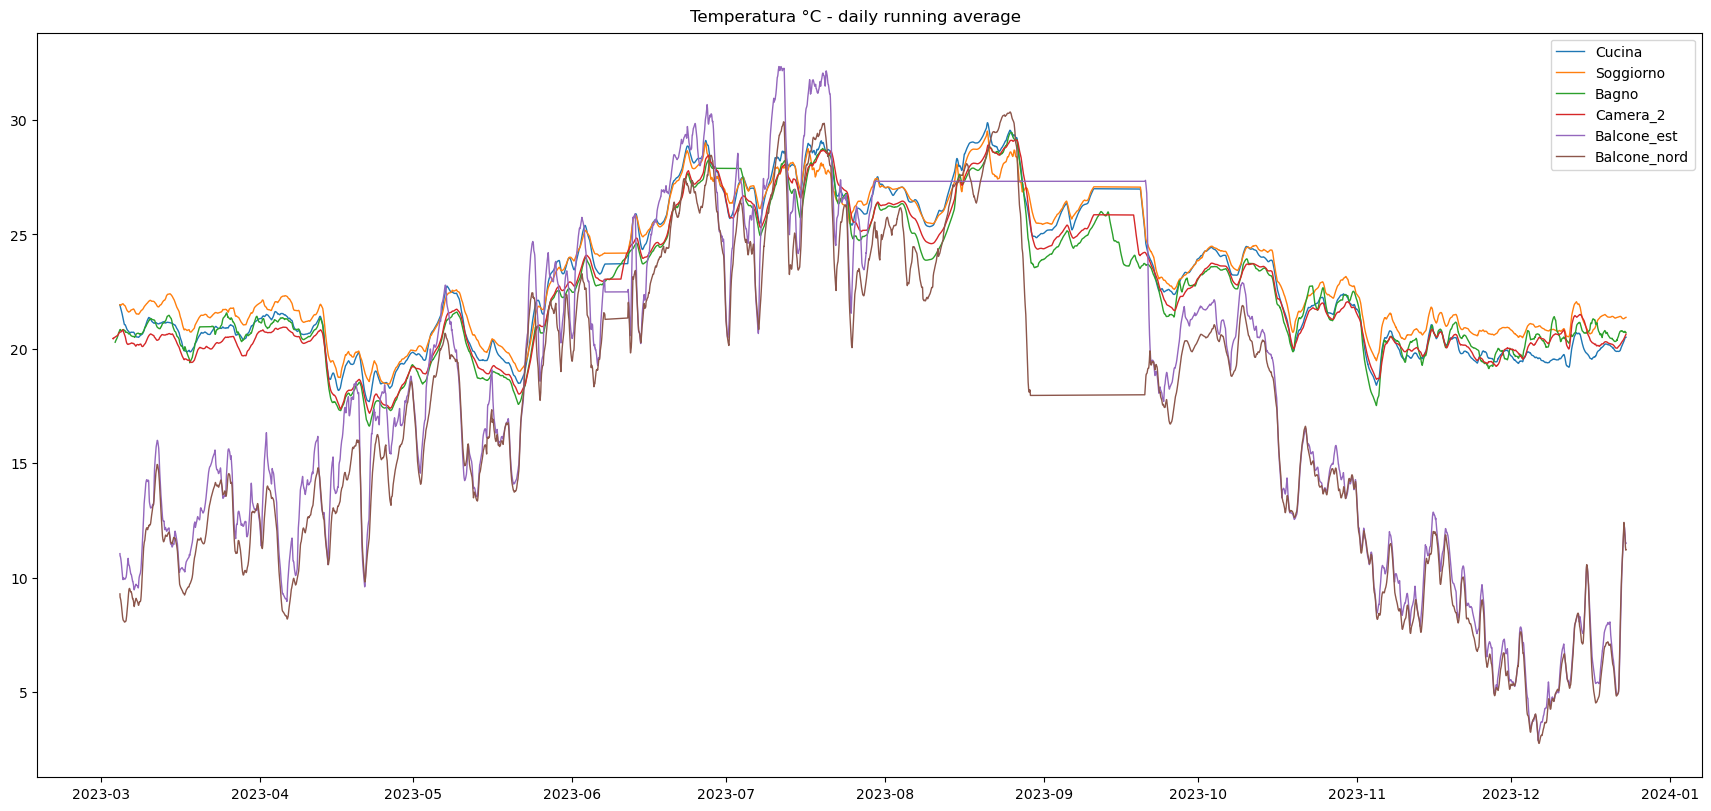

In [ ]:
fig, ax=plt.subplots(figsize=(17,8), layout="constrained")
fig.suptitle('Temperatura °C - daily running average')

ax.plot(df_igrometri[df_igrometri["stanza"]=="Cucina"].data, df_igrometri[df_igrometri["stanza"]=="Cucina"].temperatura.rolling(window=144).mean(),label='Cucina', linewidth=1)
ax.plot(df_igrometri[df_igrometri["stanza"]=="Soggiorno"].data, df_igrometri[df_igrometri["stanza"]=="Soggiorno"].temperatura.rolling(window=144).mean(),label='Soggiorno',linewidth=1)
ax.plot(df_igrometri[df_igrometri["stanza"]=="Bagno"].data, df_igrometri[df_igrometri["stanza"]=="Bagno"].temperatura.rolling(window=144).mean(),label='Bagno',linewidth=1)
ax.plot(df_igrometri[df_igrometri["stanza"]=="Camera_2"].data, df_igrometri[df_igrometri["stanza"]=="Camera_2"].temperatura.rolling(window=144).mean(),label='Camera_2',linewidth=1)
ax.plot(df_igrometri[df_igrometri["stanza"]=="Balcone_est"].data, df_igrometri[df_igrometri["stanza"]=="Balcone_est"].temperatura.rolling(window=144).mean(),label='Balcone_est',linewidth=1)
ax.plot(df_igrometri[df_igrometri["stanza"]=="Balcone_nord"].data, df_igrometri[df_igrometri["stanza"]=="Balcone_nord"].temperatura.rolling(window=144).mean(), label='Balcone_nord',linewidth=1)
plt.legend()
plt.savefig("./grafici/Temperatura_stanze_daily_running_average.jpg")
plt.show()

## Andamento percentuale di umidita sovrapposto delle differenti stanze

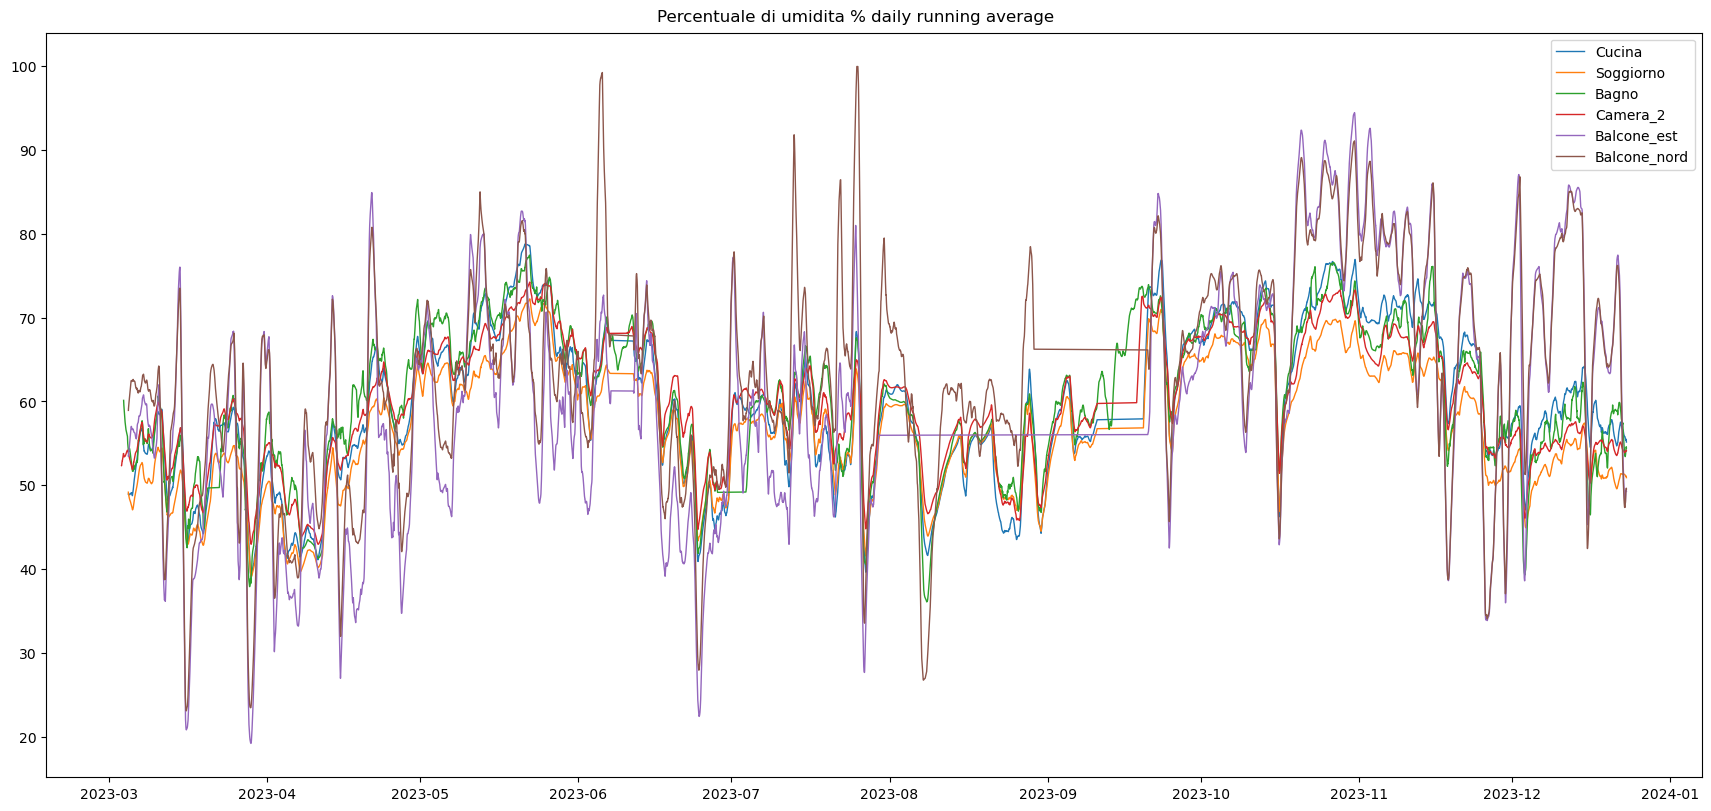

In [ ]:
fig, ax=plt.subplots(figsize=(17,8), layout="constrained")
fig.suptitle('Percentuale di umidita % daily running average')

ax.plot(df_igrometri[df_igrometri["stanza"]=="Cucina"].data, df_igrometri[df_igrometri["stanza"]=="Cucina"].umidita.rolling(window=144).mean(),label='Cucina',linewidth=1)
ax.plot(df_igrometri[df_igrometri["stanza"]=="Soggiorno"].data, df_igrometri[df_igrometri["stanza"]=="Soggiorno"].umidita.rolling(window=144).mean(),label='Soggiorno',linewidth=1)
ax.plot(df_igrometri[df_igrometri["stanza"]=="Bagno"].data, df_igrometri[df_igrometri["stanza"]=="Bagno"].umidita.rolling(window=144).mean(),label='Bagno',linewidth=1)
ax.plot(df_igrometri[df_igrometri["stanza"]=="Camera_2"].data, df_igrometri[df_igrometri["stanza"]=="Camera_2"].umidita.rolling(window=144).mean(),label='Camera_2',linewidth=1)
ax.plot(df_igrometri[df_igrometri["stanza"]=="Balcone_est"].data, df_igrometri[df_igrometri["stanza"]=="Balcone_est"].umidita.rolling(window=144).mean(),label='Balcone_est',linewidth=1)
ax.plot(df_igrometri[df_igrometri["stanza"]=="Balcone_nord"].data, df_igrometri[df_igrometri["stanza"]=="Balcone_nord"].umidita.rolling(window=144).mean(),label='Balcone_nord',linewidth=1)
plt.legend()
plt.savefig("./grafici/Percentuale_umidita_daily_running_average.jpg")
plt.show()

## Andamento delle temperature
Multipli grafici per l'andamento delle temperature nelle singole stanze

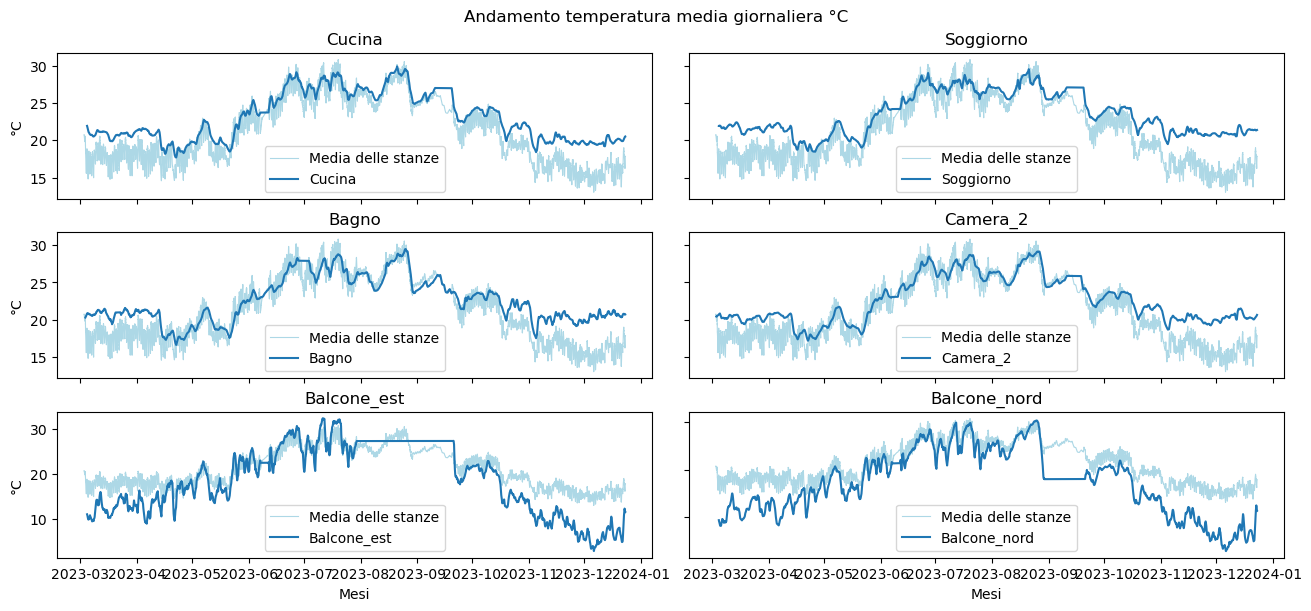

In [ ]:
fig, axs=plt.subplots(3,2, layout="constrained",figsize=(13,6))
fig.suptitle('Andamento temperatura media giornaliera °C')

axs[0,0].plot(df_igrometri.data, df_igrometri.temperatura.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[0,0].plot(df_igrometri[df_igrometri["stanza"]=="Cucina"].data, df_igrometri[df_igrometri["stanza"]=="Cucina"].temperatura.rolling(window=144).mean(), label="Cucina")
axs[0,0].legend()
axs[0,0].set_title('Cucina')

axs[0,1].plot(df_igrometri.data, df_igrometri.temperatura.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[0,1].plot(df_igrometri[df_igrometri["stanza"]=="Soggiorno"].data, df_igrometri[df_igrometri["stanza"]=="Soggiorno"].temperatura.rolling(window=144).mean(), label="Soggiorno")
axs[0,1].legend()
axs[0,1].set_title('Soggiorno')

axs[1,0].plot(df_igrometri.data, df_igrometri.temperatura.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[1,0].plot(df_igrometri[df_igrometri["stanza"]=="Bagno"].data, df_igrometri[df_igrometri["stanza"]=="Bagno"].temperatura.rolling(window=144).mean(), label="Bagno")
axs[1,0].legend()
axs[1,0].set_title('Bagno')

axs[1,1].plot(df_igrometri.data, df_igrometri.temperatura.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[1,1].plot(df_igrometri[df_igrometri["stanza"]=="Camera_2"].data, df_igrometri[df_igrometri["stanza"]=="Camera_2"].temperatura.rolling(window=144).mean(), label="Camera_2")
axs[1,1].legend()
axs[1,1].set_title('Camera_2')

axs[2,0].plot(df_igrometri.data, df_igrometri.temperatura.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[2,0].plot(df_igrometri[df_igrometri["stanza"]=="Balcone_est"].data, df_igrometri[df_igrometri["stanza"]=="Balcone_est"].temperatura.rolling(window=144).mean(), label="Balcone_est")
axs[2,0].legend()
axs[2,0].set_title('Balcone_est')

axs[2,1].plot(df_igrometri.data, df_igrometri.temperatura.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[2,1].plot(df_igrometri[df_igrometri["stanza"]=="Balcone_nord"].data, df_igrometri[df_igrometri["stanza"]=="Balcone_nord"].temperatura.rolling(window=144).mean(), label="Balcone_nord")
axs[2,1].legend()
axs[2,1].set_title('Balcone_nord')

for ax in axs.flat:
    ax.set(xlabel='Mesi', ylabel='°C')

for ax in axs.flat:
    ax.label_outer()
plt.savefig("./grafici/Andamento_temperatura_media_giornaliera_stanze.jpg")
plt.show()

## Andamento della percentuale di umidita
Multipli grafici per l'andamento della percentuale di umidita nelle singole stanze

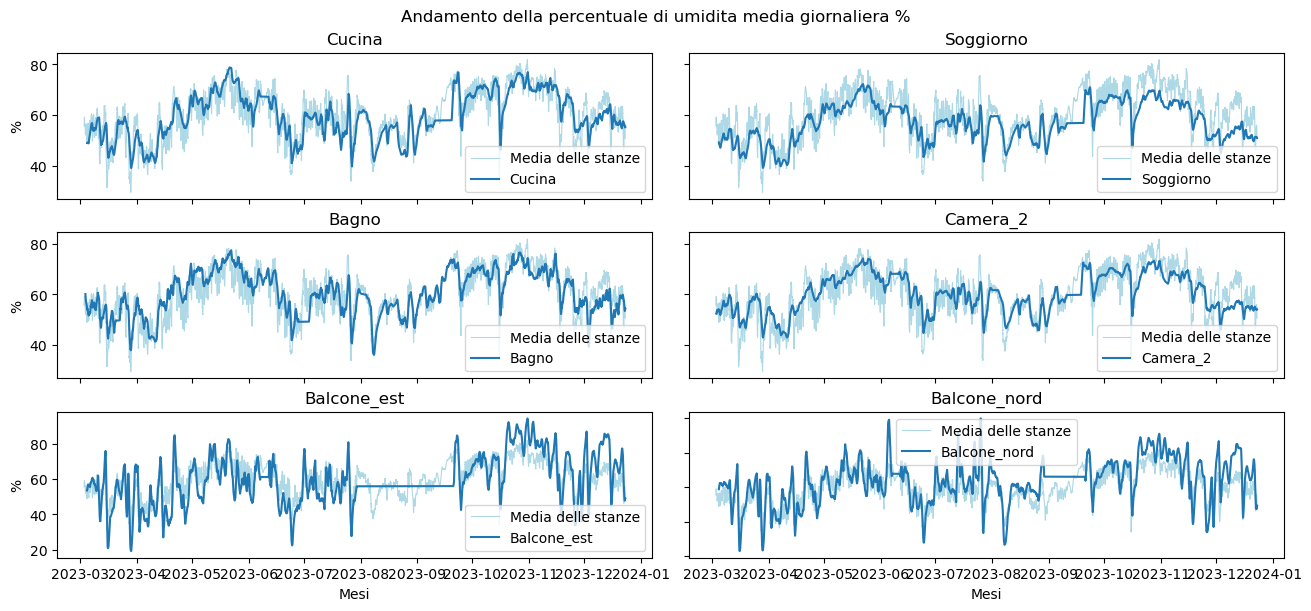

In [ ]:
fig, axs=plt.subplots(3,2, layout="constrained",figsize=(13,6))
fig.suptitle('Andamento della percentuale di umidita media giornaliera %')

axs[0,0].plot(df_igrometri.data, df_igrometri.umidita.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[0,0].plot(df_igrometri[df_igrometri["stanza"]=="Cucina"].data, df_igrometri[df_igrometri["stanza"]=="Cucina"].umidita.rolling(window=144).mean(),label="Cucina")
axs[0,0].legend()
axs[0,0].set_title('Cucina')

axs[0,1].plot(df_igrometri.data, df_igrometri.umidita.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[0,1].plot(df_igrometri[df_igrometri["stanza"]=="Soggiorno"].data, df_igrometri[df_igrometri["stanza"]=="Soggiorno"].umidita.rolling(window=144).mean(), label="Soggiorno")
axs[0,1].legend()
axs[0,1].set_title('Soggiorno')

axs[1,0].plot(df_igrometri.data, df_igrometri.umidita.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[1,0].plot(df_igrometri[df_igrometri["stanza"]=="Bagno"].data, df_igrometri[df_igrometri["stanza"]=="Bagno"].umidita.rolling(window=144).mean(),label="Bagno")
axs[1,0].legend()
axs[1,0].set_title('Bagno')

axs[1,1].plot(df_igrometri.data, df_igrometri.umidita.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[1,1].plot(df_igrometri[df_igrometri["stanza"]=="Camera_2"].data, df_igrometri[df_igrometri["stanza"]=="Camera_2"].umidita.rolling(window=144).mean(),label="Camera_2")
axs[1,1].legend()
axs[1,1].set_title('Camera_2')

axs[2,0].plot(df_igrometri.data, df_igrometri.umidita.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[2,0].plot(df_igrometri[df_igrometri["stanza"]=="Balcone_est"].data, df_igrometri[df_igrometri["stanza"]=="Balcone_est"].umidita.rolling(window=144).mean(),label="Balcone_est")
axs[2,0].legend()
axs[2,0].set_title('Balcone_est')

axs[2,1].plot(df_igrometri.data, df_igrometri.umidita.rolling(window=144).mean(), linewidth=.8, color="lightblue", label="Media delle stanze")
axs[2,1].plot(df_igrometri[df_igrometri["stanza"]=="Balcone_nord"].data, df_igrometri[df_igrometri["stanza"]=="Balcone_nord"].umidita.rolling(window=144).mean(),label="Balcone_nord")
axs[2,1].legend()
axs[2,1].set_title('Balcone_nord')

for ax in axs.flat:
    ax.set(xlabel='Mesi', ylabel='%')

for ax in axs.flat:
    ax.label_outer()
plt.savefig("./grafici/Andamento_percentuale_umidita_media_giornaliera_stanze.jpg")
plt.show()

## Andamento temperatura soggiorno e balcone

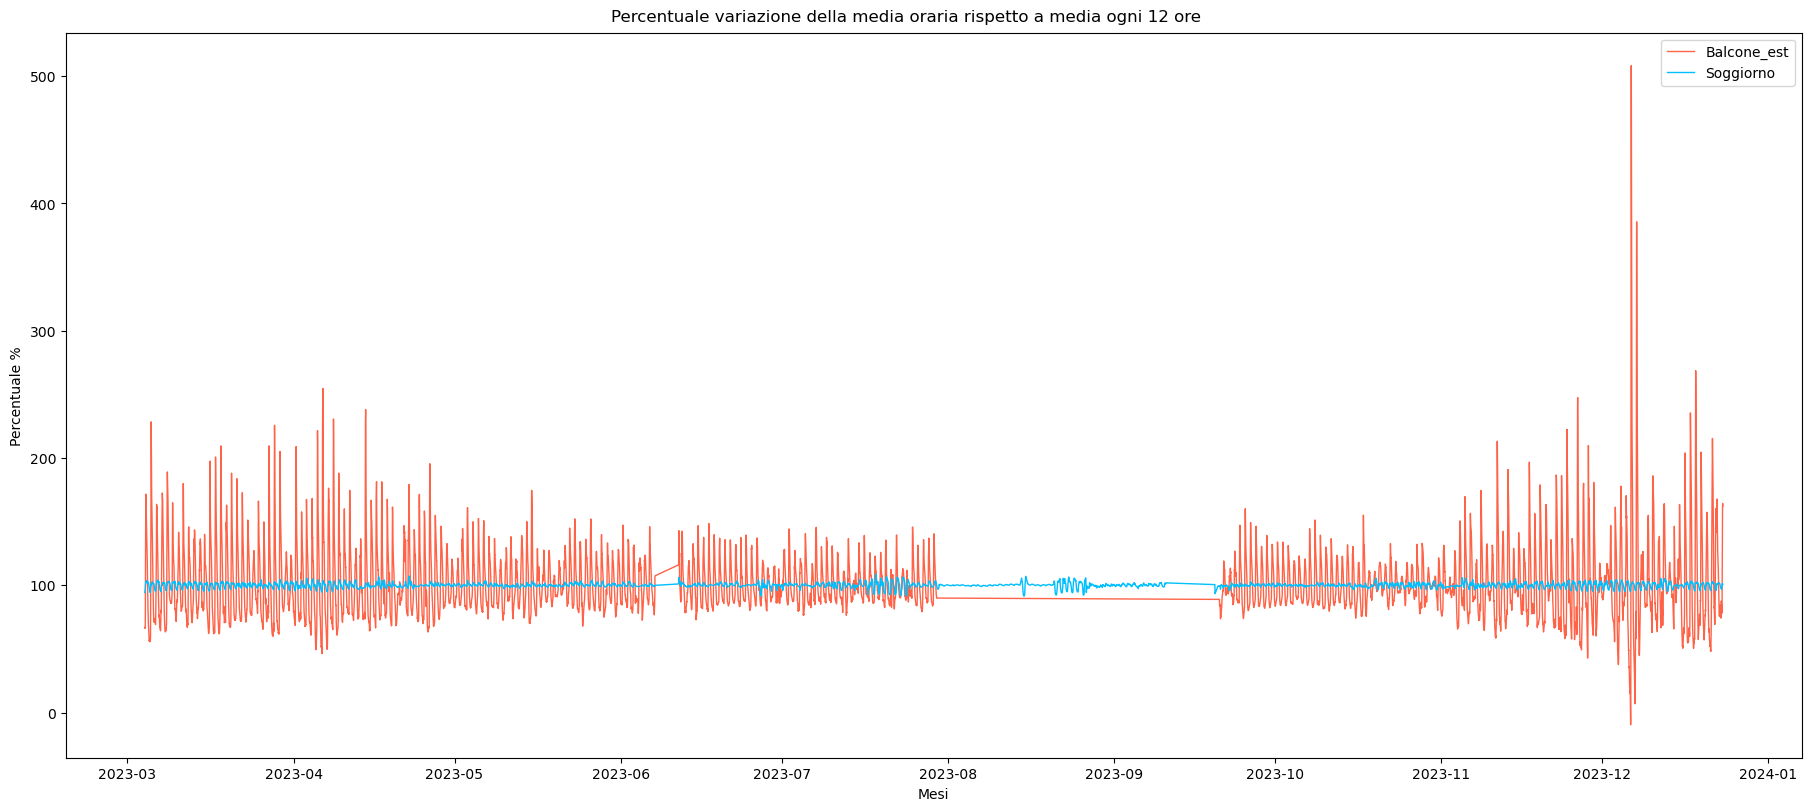

In [ ]:
fig, ax=plt.subplots(figsize=(18,8), layout="constrained")
fig.suptitle('Percentuale variazione della media oraria rispetto a media ogni 12 ore')
ax.plot(df_igrometri[df_igrometri["stanza"]=="Balcone_est"].data,
        df_igrometri[df_igrometri["stanza"]=="Balcone_est"].temperatura.rolling(window=6).mean()/df_igrometri[df_igrometri["stanza"]=="Balcone_est"].temperatura.rolling(window=72).mean()*100,
        label="Balcone_est", linewidth=1,color="tomato")
ax.plot(df_igrometri[df_igrometri["stanza"]=="Soggiorno"].data,
        df_igrometri[df_igrometri["stanza"]=="Soggiorno"].temperatura.rolling(window=6).mean()/df_igrometri[df_igrometri["stanza"]=="Soggiorno"].temperatura.rolling(window=72).mean()*100,
        label="Soggiorno", linewidth=1,color="deepskyblue")
ax.set(xlabel='Mesi', ylabel='Percentuale %')
plt.legend()
plt.savefig("./grafici/Percentuale_variazione_media_oraria_rispetto_media_12_ore.jpg")
plt.show()

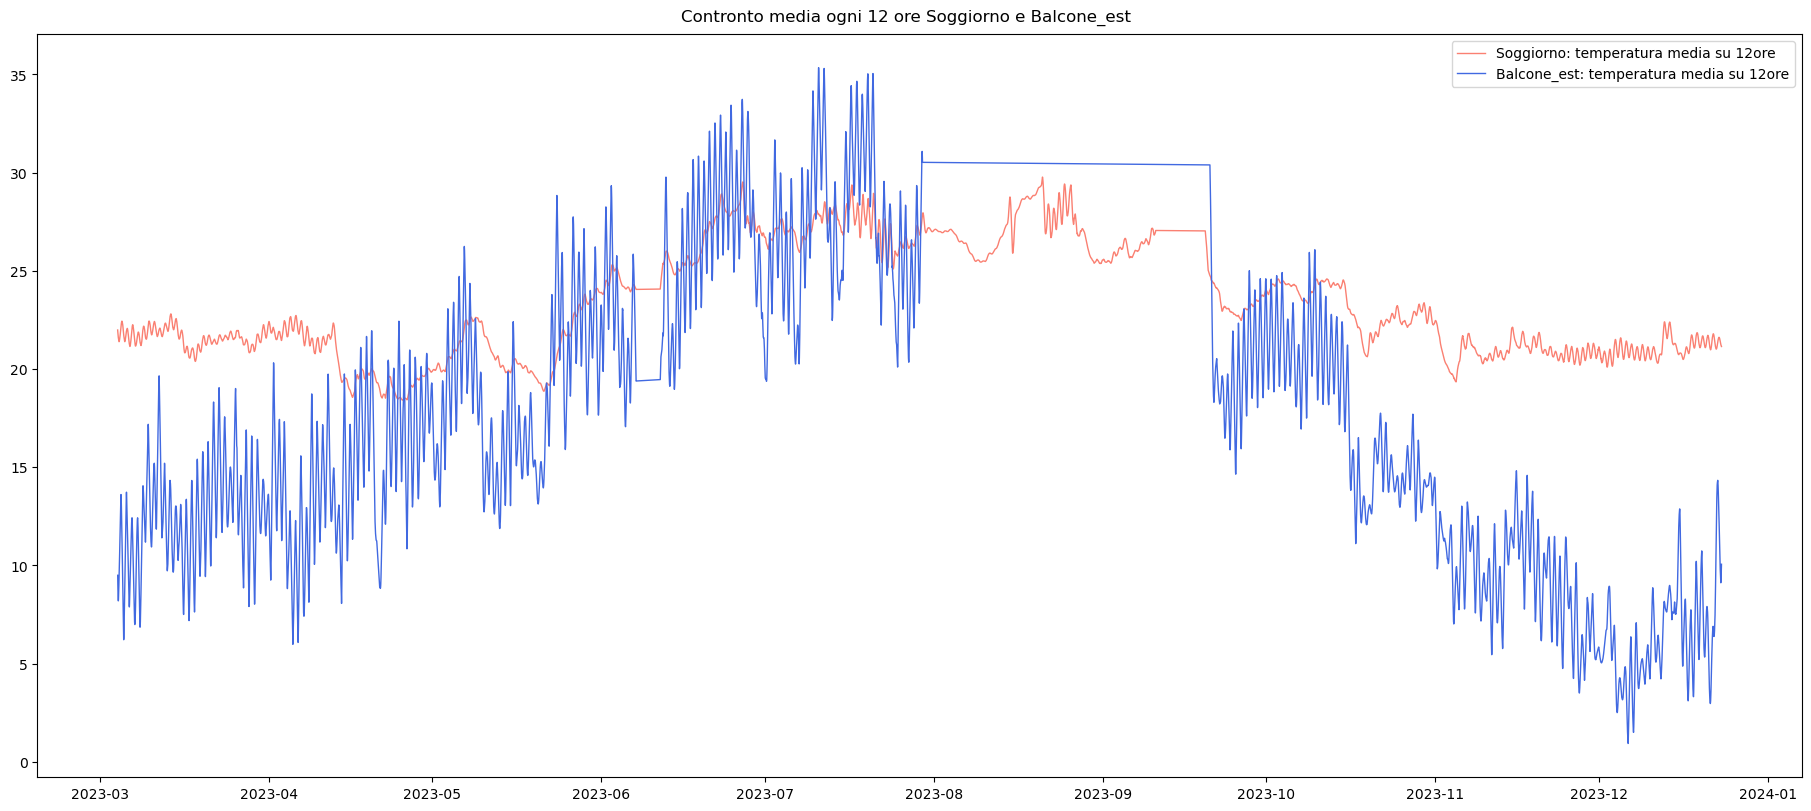

In [ ]:
fig, ax=plt.subplots(figsize=(18,8), layout="constrained")
fig.suptitle('Contronto media ogni 12 ore Soggiorno e Balcone_est')

ax.plot(df_igrometri[df_igrometri["stanza"]=="Soggiorno"].data, df_igrometri[df_igrometri["stanza"]=="Soggiorno"].temperatura.rolling(window=72).mean(),
        label="Soggiorno: temperatura media su 12ore", linewidth=1,color="salmon")
ax.plot(df_igrometri[df_igrometri["stanza"]=="Balcone_est"].data, df_igrometri[df_igrometri["stanza"]=="Balcone_est"].temperatura.rolling(window=72).mean(),
        label="Balcone_est: temperatura media su 12ore", linewidth=1,color="royalblue")
plt.legend()
plt.savefig("./grafici/Contronto_media__12_ore_soggiorno_balcone_est.jpg")
plt.show()

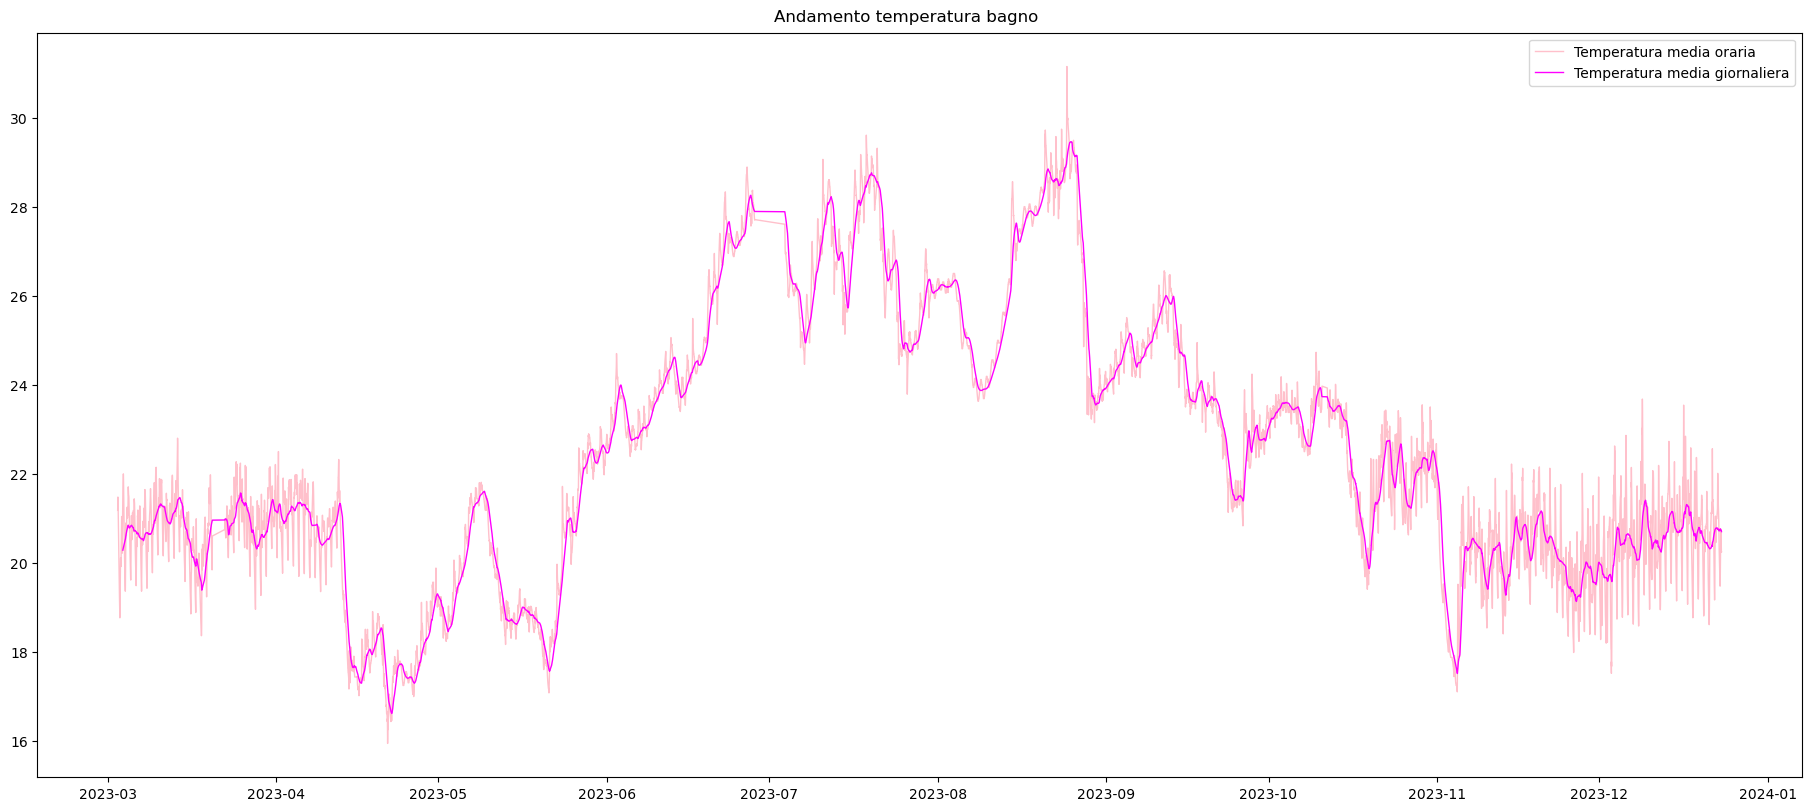

In [ ]:
fig, ax=plt.subplots(figsize=(18,8), layout="constrained")
fig.suptitle('Andamento temperatura bagno')

ax.plot(df_igrometri[df_igrometri["stanza"]=="Bagno"].data, df_igrometri[df_igrometri["stanza"]=="Bagno"].temperatura.rolling(window=6).mean(),
        label="Temperatura media oraria", color="pink", linewidth=1)
ax.plot(df_igrometri[df_igrometri["stanza"]=="Bagno"].data, df_igrometri[df_igrometri["stanza"]=="Bagno"].temperatura.rolling(window=144).mean(),
        label="Temperatura media giornaliera",color="magenta", linewidth=1)
plt.legend()
plt.savefig("./grafici/Andamento_temperatura_bagno.jpg")
plt.show()